# Projeto 2 - NLP

-----

Nome:  
Turma:

Os segundo projeto do módulo de Machine Learning será focado no processamento de linguagem natural! Usaremos os algoritmos aprendidos e as técnicas vistas na segunda parte do curso para extrairmos informações relevantes de texto. Mais precisamente, de publicações no Twitter.

## Os Dados

Utilizaremos um Dataset obtido do Twitter com 100K postagens entre os dias 01/08/2018 e 20/10/2018. Cada postagem é classificada como **positiva**, **negativa** ou **neutra**.  

Dois arquivos serão disponilizados para o desenvolvimento dos modelos, um para treino/validação e outro para submissão. Os arquivos se encontram na pasta */Dados/train* e */Dados/subm*, respectivamente.

Descrição das colunas:

- **id**: ID único para o tweet  
- **tweet_text**: Texto da publicação no Twitter  
- **tweet_date**: Data da publicação no Twitter  
- **sentiment**: 0, se negativo; 1, se positivo; 2, se neutro  
- **query_used**: Filtro utilizado para buscar a publicação

## O Problema

Você deverá desenvolver um modelo para detectar o sentimento de uma publicação do Twitter a classificando em uma das três categorias: **positiva**, **negativa** ou **neutra**. O texto da publicação está disponível na coluna "tweet_text". Teste pelo menos 2 técnicas de NLP diferentes e escolha a métrica de avaliação que julgar mais pertinente.  

Escolha o melhor modelo e gere uma base a partir dos dados de submissão, que estão no caminho ```Dados/subm/Subm3Classes.csv```, com o seguinte formato:


|id|sentiment_predict
|-|-|
|12123232|0
|323212|1
|342235|2

Salve essa tabela como um arquivo csv com o nome ```<nome>_<sobrenome>_nlp_degree.csv``` e submeta-o como parte da entrega final do projeto.  

Para ajudar no desenvolvimento, é possível dividir o projeto em algumas fases:

- **Análise de consistência dos dados**: analise se os dados estão fazendo sentido, se os campos estão completos e se há dados duplicados ou faltantes. Se julgar necessário, trate-os.    


- **Análise exploratória**: analise a sua base como um todo, verifique o balanceamento entre as classes e foque, principalmente, na coluna ```tweet_text```.    


- **Pré-processamento e transformações**: projetos de NLP exigem um considerável pré-processamento. Foque no tratamento da string do texto. Procure começar com tratamentos simples e adicione complexidade gradualmente. Nessa etapa você testará diferentes técnicas de transformações, como o Bag Of Words e o TF-IDF.    


- **Treinamento do modelo**: depois das transformações, você poderá executar o treinamento do modelo classificador. Nessa etapa o problema se torna semelhante aos abordados nos módulos anteriores. Você pode testar diversos classificadores como RandomForest, AdaBoost, entre outros. Otimize os hiperparâmetros do modelo com técnicas como a GridSearch e a RandomizedSearch.    


- **Conclusões**: descreva, em texto, as conclusões sobre os seus estudos. O modelo é capaz de identificar o sentimento das publicações? É possível extrapolar o modelo para outros contextos, como a análise de sentimento de uma frase qualquer? Pense em questões pertinentes e relevantes que você tenha obtido durante o desenvolvimento do projeto!     



## Critérios de avaliação

Os seguintes itens serão avaliados:

1. Desenvolvimento das etapas descritas acima;


2. Reprodutibilidade do código: seu código será executado e precisa gerar os mesmos resultados apresentados por você;


3. Clareza: seu código precisa ser claro e deve existir uma linha de raciocínio direta. Comente o código em pontos que julgar necessário para o entendimento total;


4. Justificativa das conclusões obitdas: não existirá certo ou errado, mas as decisões e as conclusões precisam ser bem justificadas com base nos resultados obtidos.  

O desempenho do modelo **não** será considerado como critério de avaliação.  

## Informações gerais

- O projeto deve ser desenvolvido individualmente;



- Entrega através do Class: Processamento Digital de Imagens - Definições e Fundamentos
 -> Exercícios -> Projeto 2


Anexar, na entrega, o notebook de desenvolvimento e o arquivo .csv de submissão, da seguinte forma:  

Criar um arquivo zip com:
- notebook: ```<nome>_<sobrenome>_<númeroTurma>_projeto_2.ipynb```   
- csv: ```<nome>_<sobrenome>_<númeroTurma>_projeto_2_submissao.csv```


## Dicas

### Base de treino e submissão

A base de submissão não possui a variável de saída, portanto ela será utilizada **apenas** para gerar o arquivo que acompanha a submissão do projeto.      

### Tente encontrar possíveis vieses

É muito comum que modelos de NLP possuam fortes vieses, como a tendência de relacionar palavras específicas com alguma classe de saída. Tente encontrar vieses no seu estudo, isso pode ajudar a tirar boas conclusões. o campo "query_used" pode ser útil para essa análise.  

### O pré-processamento é a chave para um bom desempenho

Essa é a etapa que mais vai contribuir para o desempenho do seu modelo. Seja criativo e desenvolva essa etapa de uma maneira que seja fácil de aplicar o mesmo processamento para uma nova base, você terá que fazer isso para gerar a base de submissão.

-------

ANALISE DE CONSISTENCIA DOS DADOS

In [77]:
import pandas as pd

In [78]:
# Carregando os datasets

df_train = pd.read_csv("./Dados/train/Train3Classes.csv")

df_train.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1049721159292346368,Rio elege maior bancada policial de sua histór...,Tue Oct 09 18:00:01 +0000 2018,2,folha
1,1046251157025423360,fiquei tão triste quando eu vi o preço da câme...,Sun Sep 30 04:11:28 +0000 2018,0,:(
2,1041744620206653440,"Para Theresa May, seu plano para o Brexit é a ...",Mon Sep 17 17:44:06 +0000 2018,2,exame
3,1046937084727107589,caralho eu quero proteger a danielly em um pot...,Tue Oct 02 01:37:06 +0000 2018,0,:(
4,1047326854229778432,@SiCaetano_ viva o caos :),Wed Oct 03 03:25:55 +0000 2018,1,:)


In [79]:
df_subm = pd.read_csv("./Dados/subm/Subm3Classes.csv")

df_subm.head()

,id,tweet_text,tweet_date,query_used
0,1046764676707753987,Apartamento Vila Mariana Praça Monteiro dos Sa...,Mon Oct 01 14:12:01 +0000 2018,:)
1,1047329264943751169,@FalleNCS @BrasilGameShow quero 1x1 de scout. ...,Wed Oct 03 03:35:29 +0000 2018,:)
2,1045443874947313665,mais uma analógica no correio à minha espera :...,Thu Sep 27 22:43:37 +0000 2018,:)
3,1040484298711814144,"Em festa de posse como presidente do STF, Toff...",Fri Sep 14 06:16:02 +0000 2018,folha
4,1045411876887306240,@thethiagor @jubsilva @GSCISA @GrupoMulheRIs A...,Thu Sep 27 20:36:28 +0000 2018,:)


In [80]:
print(f'Dimensão df treino: {df_train.shape}')
print(f'Dimensão df submissão: {df_subm.shape}')

print('Como esperado no df_subm não temos a coluna sentimento e ele tem uma dimensão menor que o df_train. Deste ponto em diante farei análise somente do dataset de treino.')

Dimensão df treino: (95000, 5)
Dimensão df submissão: (5000, 4)
Como esperado no df_subm não temos a coluna sentimento e ele tem uma dimensão menor que o df_train. Deste ponto em diante farei análise somente do dataset de treino.


In [81]:
# Informações sobre o dataset de treino

df_train.info()

print('Podemos ver que não há valores nulos no dataset de treino')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95000 entries, 0 to 94999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          95000 non-null  int64 
 1   tweet_text  95000 non-null  object
 2   tweet_date  95000 non-null  object
 3   sentiment   95000 non-null  int64 
 4   query_used  95000 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.6+ MB
Podemos ver que não há valores nulos no dataset de treino


In [82]:
# Verificação de valores duplicados

valores_duplicados = df_train.duplicated()

print("Não há valores duplicados no dataset de treino")
df_train[valores_duplicados].head()


Não há valores duplicados no dataset de treino


,id,tweet_text,tweet_date,sentiment,query_used


Não foram encontrados grandes problemas. Temos poucas features, não há dados duplicados, não há dados nulos. Nada muito relevante.

ANALISE EXPLORATORIA

In [83]:
#Verificação de tweets por id

ids_unicos = df_train['id'].nunique()
print(f"Id's únicos na base de treino: {ids_unicos}")
print("Poucos usuários postaram mais de uma vez (somente 13 de 95000). Não há nenhuma concentração de tweets por usuário.")

Id's únicos na base de treino: 94987
Poucos usuários postaram mais de uma vez (somente 13 de 95000). Não há nenhuma concentração de tweets por usuário.


In [84]:
#Verificação das classes

print("Basta olharmos o resultado do 'value_counts' para percebermos que as classes são bastante balanceadas e dispensamos até mesmo o uso de gráficos.")
df_train['sentiment'].value_counts()

Basta olharmos o resultado do 'value_counts' para percebermos que as classes são bastante balanceadas e dispensamos até mesmo o uso de gráficos.


0    31696
1    31678
2    31626
Name: sentiment, dtype: int64

Para fazermos uma análise exploratória olhando para a feature de 'tweet_text' faz-se necessário iniciar a próxima etapa de pré-processamento.

PRE-PROCESSAMENTO

In [85]:
#Importação de bibliotecas para pré-processamento

import re
import numpy as np
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from unidecode import unidecode 
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from PIL import Image


In [86]:
#Criando a lista de 'stopwords'
stopwords_pt = stopwords.words('portuguese')
print(stopwords_pt)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [87]:
#Na função de pre-processamento abaixo iremos tirar a acentuação antes de retirar as stopwords. Sendo assim, vamos retirar os acentos das stopwords.
stopwords_pt_sem_acentos = []
for element in stopwords_pt:
    element_sem_acento = unidecode(element)
    stopwords_pt_sem_acentos.append(element_sem_acento)
print(stopwords_pt_sem_acentos) 

['de', 'a', 'o', 'que', 'e', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'nao', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'a', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'ja', 'eu', 'tambem', 'so', 'pelo', 'pela', 'ate', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'voce', 'essa', 'num', 'nem', 'suas', 'meu', 'as', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nos', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'voces', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'esta', 'estamos', 'estao', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estavamos', 'estavam', 'estivera', 'estiveramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivessemos', 'estivessem', 'estiver', 'estiv

In [88]:
'''Criação de função que irá retirar caracteres especiais, deixar tudo com letra minúscula, sem acentos, retirar espaços, 
repetição de caracteres, tokenização, retirar as stopwords. Será usada em cada linha do dataframe. 
Está sendo utilizada a biblioteca NLTK.'''

def pre_processamento(linha, stopwords = stopwords_pt_sem_acentos):
    
    #Removendo menções
    linha = re.sub(r'@[a-zA-Z0-9_]{1,50}','',linha)
    #Removendo o links:
    linha = re.sub(r'(https:\/\/.+)','',linha)
    #Colocando todas as palavras em minúsculo
    linha = linha.lower()
    #Removendo todos os :d (sorriso) ou sorriso:p
    linha = linha.replace(':d','')
    linha = linha.replace(':p','')
    #Removendo os digitos
    linha = re.sub(r'\d+','',linha)
    #Removendo a acentuação
    linha = unidecode(linha)
    #Removendo os caracteres especiais
    linha = re.sub(r'[^a-zA-Z0-9]',' ',linha)
    #Removendo caracteres repetidos 3 ou mais vezes
    linha = re.sub(r'(\w)\1(\1+)',r'\1',linha)
    #Removendo os espaços do inicio e final de cada frase
    linha = linha.strip()
    #Tokenizando
    palavras = word_tokenize(linha)
    #Removendo as stopwords:
    linha = [palavra for palavra in palavras if palavra not in stopwords]
    #Removendo elementos vazio 
    linha = [palavra for palavra in linha if palavra != '']
    return linha

Farei o pre-processamento dos dois datasets, o de treino e de submissão.

In [89]:
#Optando por trabalhar somente com as features de 'tweet_text', 'sentiment' e 'query_used'.

df_train_reduzida = df_train.drop(columns = ["id", "tweet_date"])
df_subm_reduzida = df_subm.drop(columns = ["id", "tweet_date"])

In [90]:
#Aplicando a função de processamento em cada linha dos dois datasets.

df_train_reduzida["processamento"] = df_train_reduzida["tweet_text"].apply(lambda x: pre_processamento(x))
df_train_reduzida["processamento_joined"] = df_train_reduzida["processamento"].apply(lambda x: ' '.join(x))

df_subm_reduzida["processamento"] = df_subm_reduzida["tweet_text"].apply(lambda x: pre_processamento(x))
df_subm_reduzida["processamento_joined"] = df_subm_reduzida["processamento"].apply(lambda x: ' '.join(x))

In [91]:
#Visualização do dataset de treino pre-processado
df_train_reduzida.head()

,tweet_text,sentiment,query_used,processamento,processamento_joined
0,Rio elege maior bancada policial de sua histór...,2,folha,"[rio, elege, maior, bancada, policial, historia]",rio elege maior bancada policial historia
1,fiquei tão triste quando eu vi o preço da câme...,0,:(,"[fiquei, tao, triste, vi, preco, camera]",fiquei tao triste vi preco camera
2,"Para Theresa May, seu plano para o Brexit é a ...",2,exame,"[theresa, may, plano, brexit, unica, opcao]",theresa may plano brexit unica opcao
3,caralho eu quero proteger a danielly em um pot...,0,:(,"[caralho, quero, proteger, danielly, pote, tad...",caralho quero proteger danielly pote tadinhaa
4,@SiCaetano_ viva o caos :),1,:),"[viva, caos]",viva caos


FINALIZAÇÃO DA ANÁLISE EXPLORATÓRIA UTILIZANDO NUVEM DE PALAVRAS

In [92]:
# Função para gerar nuvem a partir do dataset

def nuvem_de_dataframe(df, filter = False, tipo_filtro=None, column='processamento'):

    if filter:
        vocabulario = pd.DataFrame(
                                np.concatenate(df.loc[tipo_filtro, column].values),
                                columns=['word']
                                )
    else:
        vocabulario = pd.DataFrame(
                                np.concatenate(df[column].values),
                                columns=['word']
                                )                  

    dicionario = vocabulario.groupby('word').size().to_dict()
    return dicionario

#Função de plot da nuvem de palavra
def plotar_nuvem(wordcloud):
    plt.figure(figsize=(20, 15))
    plt.imshow(wordcloud) 
    plt.axis("off")

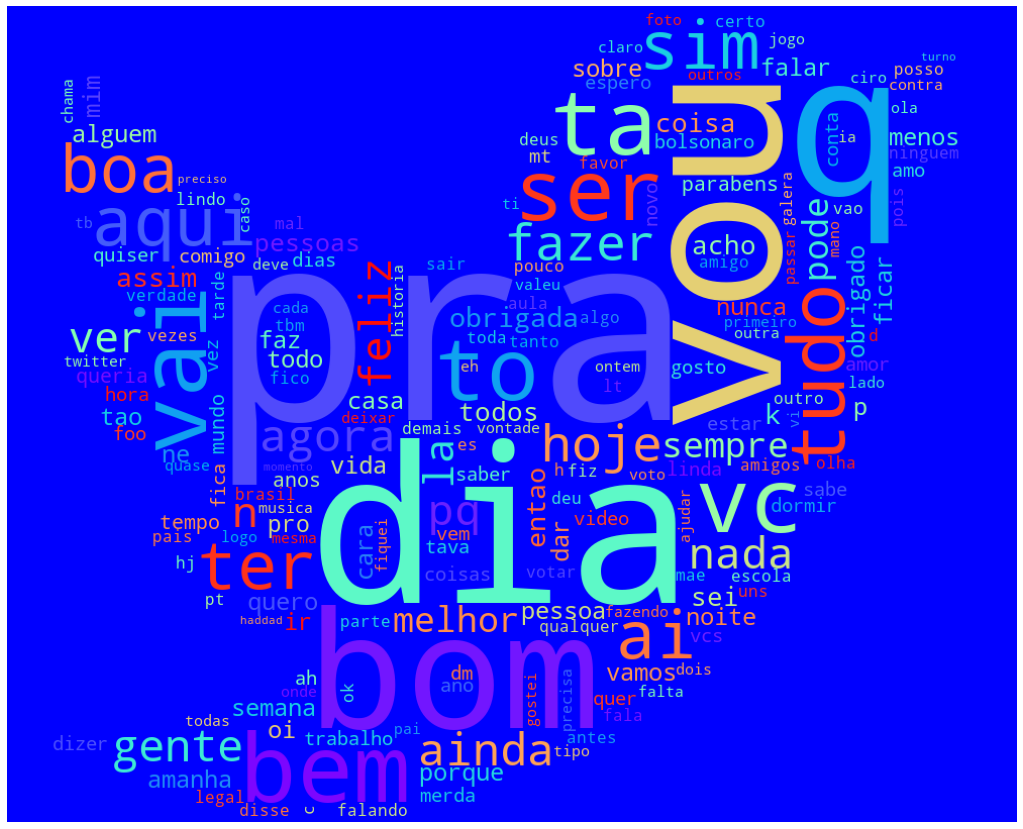

In [93]:
#Nuvem de palavras para sentimentos POSITIVOS

mascara = np.array(Image.open('twitter.png'))

filter = (df_train_reduzida['sentiment'] == 1)

#Gerando a nuvem
wordcloud = (WordCloud(
                        width=3000,
                        height=2000,
                        random_state=1,
                        background_color="blue",
                        colormap="rainbow",
                        collocations=False,
                        stopwords=stopwords_pt_sem_acentos,
                        mask = mascara
                    ).generate_from_frequencies(nuvem_de_dataframe(df_train_reduzida, filter=True, tipo_filtro=filter)))     

#Plotando a nuvem
plotar_nuvem(wordcloud)

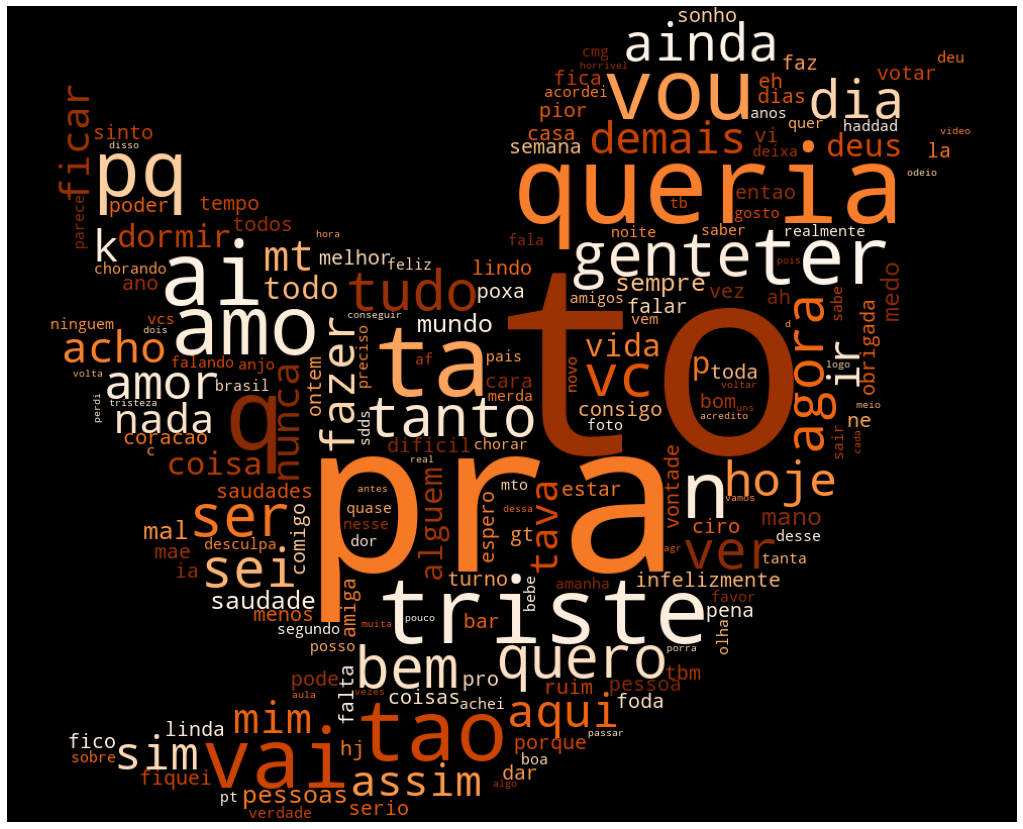

In [94]:
#Nuvem de palavras para sentimentos NEGATIVOS

mascara = np.array(Image.open('twitter.png'))

filter = (df_train_reduzida['sentiment'] == 0)

#Gerando a nuvem
wordcloud = (WordCloud(
                        width=3000,
                        height=2000,
                        random_state=1,
                        background_color="blACK",
                        colormap="Oranges_r",
                        collocations=False,
                        stopwords=stopwords_pt_sem_acentos,
                        mask = mascara
                    ).generate_from_frequencies(nuvem_de_dataframe(df_train_reduzida, filter=True, tipo_filtro=filter)))     

#Plotando a nuvem
plotar_nuvem(wordcloud)

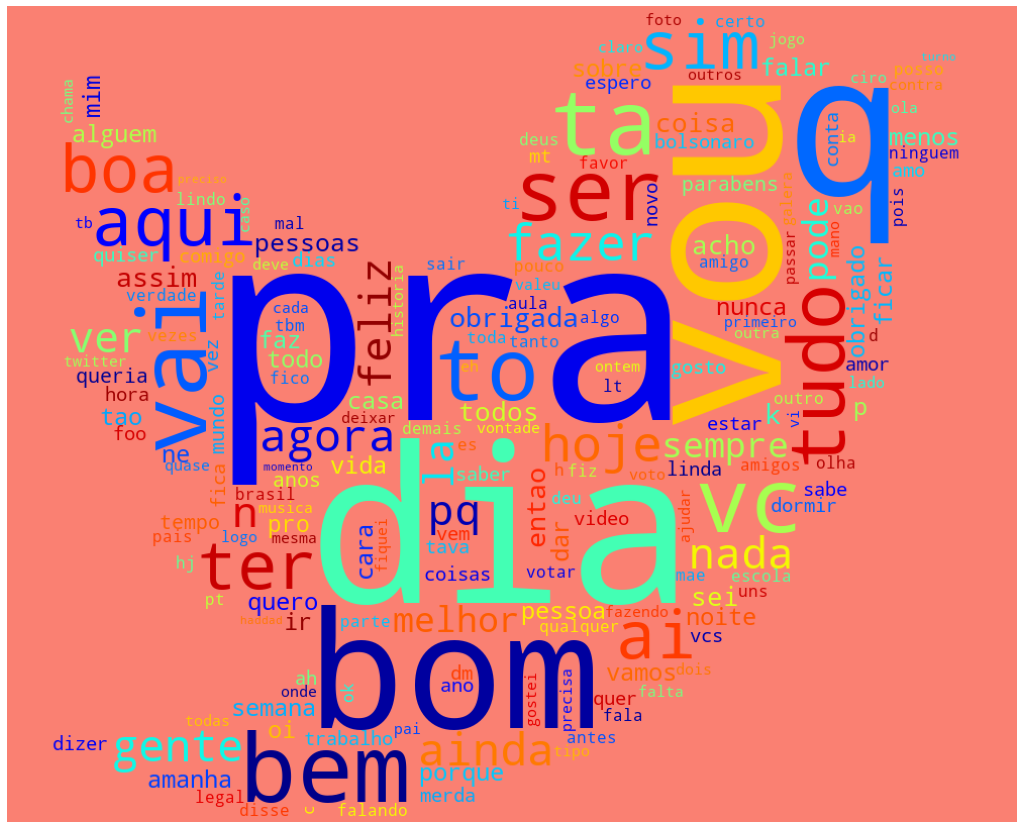

In [95]:
#Nuvem de palavras para sentimentos NEUTROS

mascara = np.array(Image.open('twitter.png'))

filter = (df_train_reduzida['sentiment'] == 1)

#Gerando a nuvem
wordcloud = (WordCloud(
                        width=3000,
                        height=2000,
                        random_state=1,
                        background_color="salmon",
                        colormap="jet",
                        collocations=False,
                        stopwords=stopwords_pt_sem_acentos,
                        mask = mascara
                    ).generate_from_frequencies(nuvem_de_dataframe(df_train_reduzida, filter=True, tipo_filtro=filter)))     

#Plotando a nuvem
plotar_nuvem(wordcloud)

Ao ver as 3 nuvens observamos muita ocorrência de palavras coloquiais e abreviadas que não trazem valor com a análise de sentimentos. Assim, vamos aumentar a lista de stopwords para ver se causa alguma diferença.

In [96]:
#Acrescentando palavras na lista de stopwords com base na visualização das nuvens:

palavras_para_stopword = ['vc', 'pra', 'td', 'aqui', 'to', 'ta', 'q', 'vai', 'ai', 'k', 'hj', 'pt', 'ia', 'gt', 'gte', 'tava', 'p', 'la', 'vao', 'tb', 'ti', 'vou', 'ne', 'tao', 'foo', 'ir', 'dm','oi', 'c', 'ok', 'deu', 'dar', 'lt', 'd', 'mt','la', 'eh']

for i in palavras_para_stopword:
    stopwords_pt_sem_acentos.append(i)

print(stopwords_pt_sem_acentos)

['de', 'a', 'o', 'que', 'e', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'nao', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'a', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'ja', 'eu', 'tambem', 'so', 'pelo', 'pela', 'ate', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'voce', 'essa', 'num', 'nem', 'suas', 'meu', 'as', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nos', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'voces', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'esta', 'estamos', 'estao', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estavamos', 'estavam', 'estivera', 'estiveramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivessemos', 'estivessem', 'estiver', 'estiv

In [97]:
#Novos datasets para processar

df_train_reduzida_2 = df_train.drop(columns = ["id", "tweet_date"])
df_subm_reduzida_2 = df_subm.drop(columns = ["id", "tweet_date"])

In [98]:
#Aplicando a função de processamento em cada linha dos dois datasets.

df_train_reduzida_2["processamento"] = df_train_reduzida_2["tweet_text"].apply(lambda x: pre_processamento(x))
df_train_reduzida_2["processamento_joined"] = df_train_reduzida_2["processamento"].apply(lambda x: ' '.join(x))

df_subm_reduzida_2["processamento"] = df_subm_reduzida_2["tweet_text"].apply(lambda x: pre_processamento(x))
df_subm_reduzida_2["processamento_joined"] = df_subm_reduzida_2["processamento"].apply(lambda x: ' '.join(x))

In [99]:
df_train_reduzida_2.head()

,tweet_text,sentiment,query_used,processamento,processamento_joined
0,Rio elege maior bancada policial de sua histór...,2,folha,"[rio, elege, maior, bancada, policial, historia]",rio elege maior bancada policial historia
1,fiquei tão triste quando eu vi o preço da câme...,0,:(,"[fiquei, triste, vi, preco, camera]",fiquei triste vi preco camera
2,"Para Theresa May, seu plano para o Brexit é a ...",2,exame,"[theresa, may, plano, brexit, unica, opcao]",theresa may plano brexit unica opcao
3,caralho eu quero proteger a danielly em um pot...,0,:(,"[caralho, quero, proteger, danielly, pote, tad...",caralho quero proteger danielly pote tadinhaa
4,@SiCaetano_ viva o caos :),1,:),"[viva, caos]",viva caos


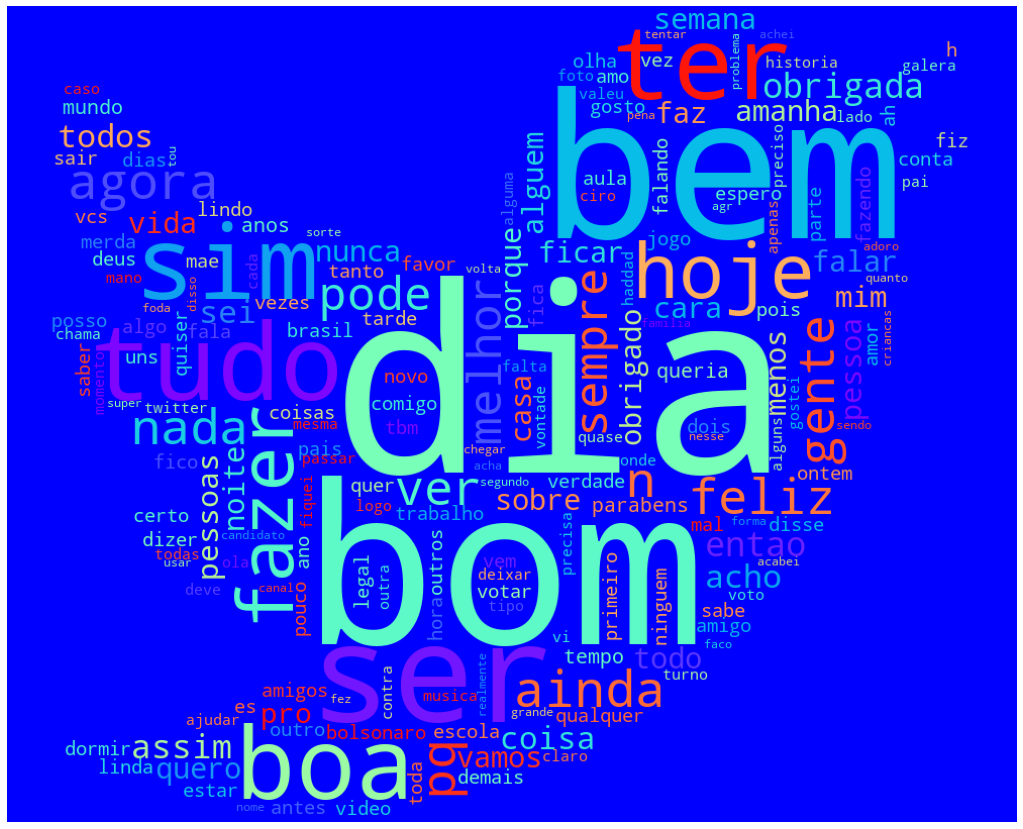

In [100]:
#Nuvem de palavras para sentimentos POSITIVOS com mais stopwords

mascara = np.array(Image.open('twitter.png'))

filter = (df_train_reduzida_2['sentiment'] == 1)

#Gerando a nuvem
wordcloud = (WordCloud(
                        width=3000,
                        height=2000,
                        random_state=1,
                        background_color="blue",
                        colormap="rainbow",
                        collocations=False,
                        stopwords=stopwords_pt_sem_acentos,
                        mask = mascara
                    ).generate_from_frequencies(nuvem_de_dataframe(df_train_reduzida_2, filter=True, tipo_filtro=filter)))     

#Plotando a nuvem
plotar_nuvem(wordcloud)

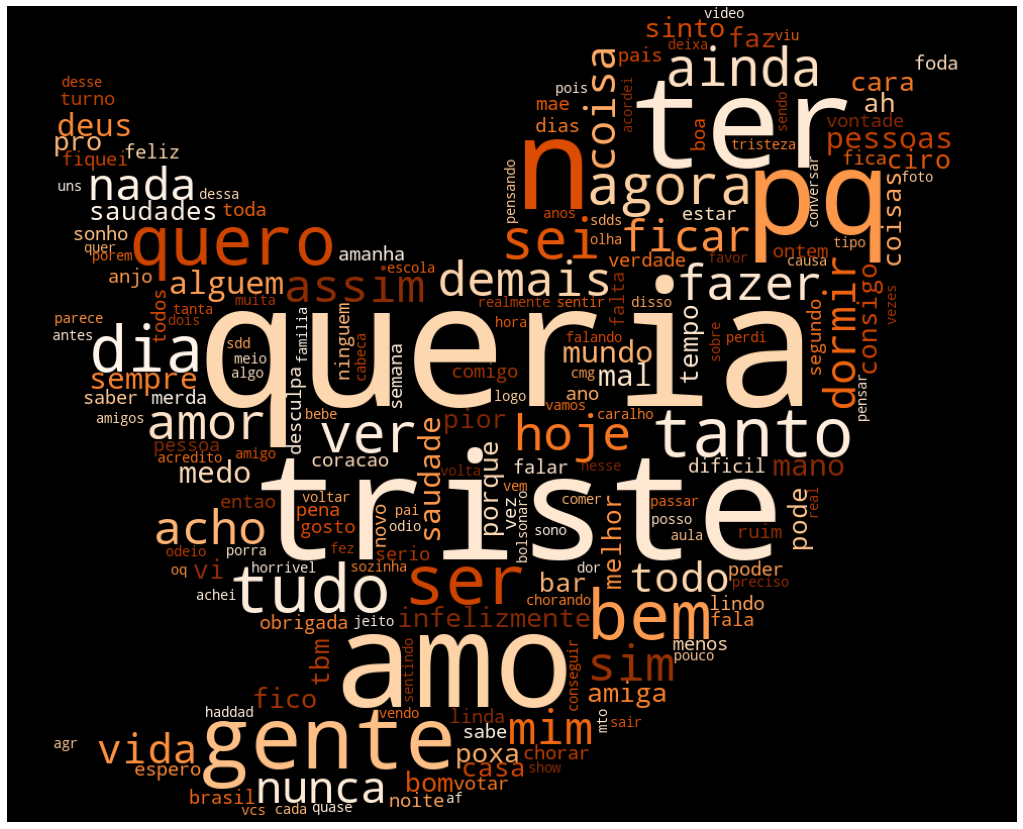

In [101]:
#Nuvem de palavras para sentimentos NEGATIVOS com mais stopwords

mascara = np.array(Image.open('twitter.png'))

filter = (df_train_reduzida_2['sentiment'] == 0)

#Gerando a nuvem
wordcloud = (WordCloud(
                        width=3000,
                        height=2000,
                        random_state=1,
                        background_color="black",
                        colormap="Oranges_r",
                        collocations=False,
                        stopwords=stopwords_pt_sem_acentos,
                        mask = mascara
                    ).generate_from_frequencies(nuvem_de_dataframe(df_train_reduzida_2, filter=True, tipo_filtro=filter)))     

#Plotando a nuvem
plotar_nuvem(wordcloud)

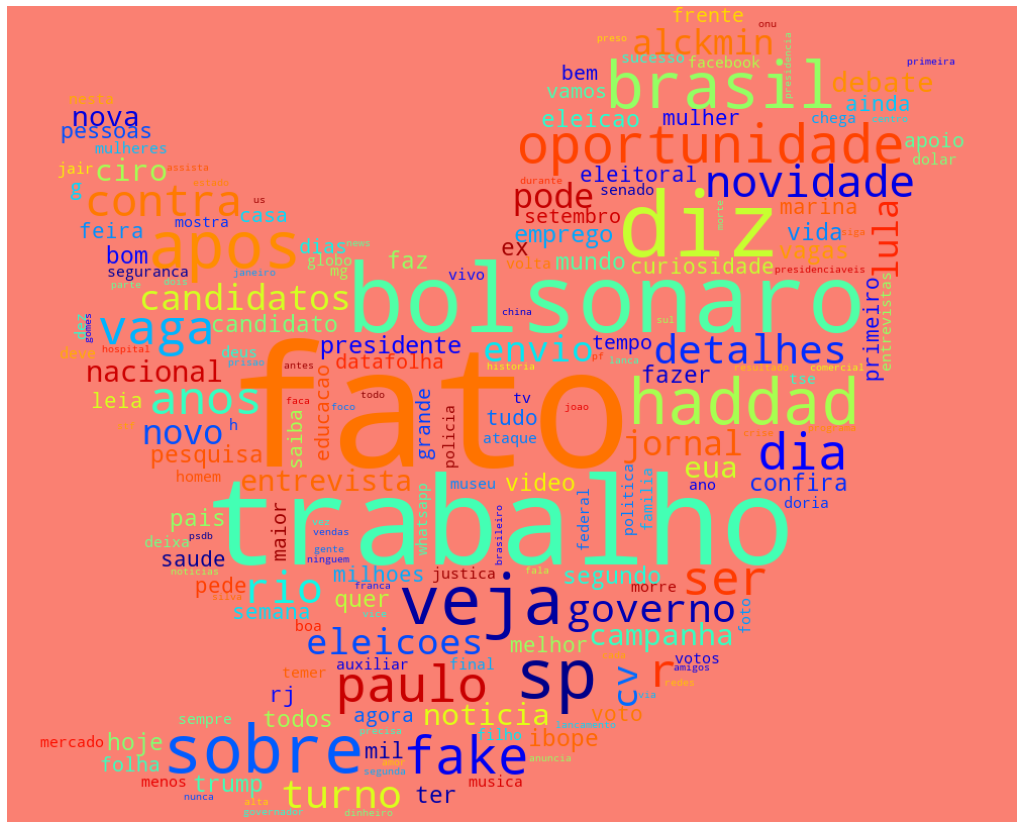

In [102]:
#Nuvem de palavras para sentimentos NEUTROS com mais stopwords

mascara = np.array(Image.open('twitter.png'))

filter = (df_train_reduzida_2['sentiment'] == 2)

#Gerando a nuvem
wordcloud = (WordCloud(
                        width=3000,
                        height=2000,
                        random_state=1,
                        background_color="salmon",
                        colormap="jet",
                        collocations=False,
                        stopwords=stopwords_pt_sem_acentos,
                        mask = mascara
                    ).generate_from_frequencies(nuvem_de_dataframe(df_train_reduzida_2, filter=True, tipo_filtro=filter)))     

#Plotando a nuvem
plotar_nuvem(wordcloud)

Após o segundo pre-processamento podemos observar uma melhor diferenciação das nuvens por sentimento. Interessante notar que a nuvem de sentimentos neutros (que se referem principalmente à fontes de mídias), possuem palavras mais formais e que facilmente relacionamos com notícias. A partir de agora trabalharemos com esse corpus nas modelagens.

PROCESSAMENTOS

1. Word2Vec

In [103]:
# Dividindo em treino e teste

X_w2v = df_train_reduzida_2["processamento"]
y_w2v = df_train_reduzida_2['sentiment'].astype(str)

from sklearn.model_selection import train_test_split

X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, 
                                                     y_w2v, 
                                                     test_size = 0.3, 
                                                     random_state = 42)

In [84]:
!pip3 install -U gensim

     ---------------------------------------- 23.9/23.9 MB 1.2 MB/s eta 0:00:00
     ------------------------------------ 983.8/983.8 KB 214.1 kB/s eta 0:00:00


You should consider upgrading via the 'c:\users\adelaide\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [104]:
#Processamento da base de treino (dividida em treino e teste) com o Word2Vec - primeiro parte do treino

from gensim.models import Word2Vec

model = Word2Vec(sentences=X_train_w2v,
                 vector_size=500,
                 min_count=5,
                 workers=2)

X_train_w2v_m = []
X_train_w2v_s = []
X_train_w2v_sn = []
for phrase in X_train_w2v:
    vecs = []
    for word in phrase:
        if word in model.wv.index_to_key:
            vecs.append(model.wv.get_vector(word))

            
    if vecs:
        soma = np.sum(vecs, axis=0)
        media = soma/len(vecs)
        soma_normalizada = soma / np.linalg.norm(soma)
        
        X_train_w2v_m.append(media)
        X_train_w2v_s.append(soma)
        X_train_w2v_sn.append(soma_normalizada)
        
    else:
        X_train_w2v_m.append(np.zeros(model.vector_size))
        X_train_w2v_s.append(np.zeros(model.vector_size))
        X_train_w2v_sn.append(np.zeros(model.vector_size))
    
    
X_train_w2v_m = np.array(X_train_w2v_m)
X_train_w2v_s = np.array(X_train_w2v_s)
X_train_w2v_sn = np.array(X_train_w2v_sn)

In [105]:
#Processamento da base de treino (dividida em treino e teste) com o Word2Vec - agora parte do teste

X_test_w2v_m = []
X_test_w2v_s = []
X_test_w2v_sn = []

for phrase in X_test_w2v:
    vecs = []
    for word in phrase:
        if word in model.wv.index_to_key:
            vecs.append(model.wv.get_vector(word))
            
    if vecs:
        soma = np.sum(vecs, axis=0)
        media = soma/len(vecs)
        soma_normalizada = soma / np.linalg.norm(soma)
        
        X_test_w2v_m.append(media)
        X_test_w2v_s.append(soma)
        X_test_w2v_sn.append(soma_normalizada)
        
    else:
        X_test_w2v_m.append(np.zeros(model.vector_size))
        X_test_w2v_s.append(np.zeros(model.vector_size))
        X_test_w2v_sn.append(np.zeros(model.vector_size))
    
    
X_test_w2v_m = np.array(X_test_w2v_m)
X_test_w2v_s = np.array(X_test_w2v_s)
X_test_w2v_sn = np.array(X_test_w2v_sn)

2. Doc2Vec

In [106]:
# Dividindo em treino e teste

X_d2v = df_train_reduzida_2["processamento"]
y_d2v = df_train_reduzida_2['sentiment']

from sklearn.model_selection import train_test_split

X_train_d2v, X_test_d2v, y_train_d2v, y_test_d2v = train_test_split(X_d2v, 
                                                     y_d2v, 
                                                     test_size = 0.2, 
                                                     random_state = 42)

In [107]:
#Modelo do Doc2Vec

from gensim.models import doc2vec

def read_corpus(list_sentences, tokens_only=False):
    if tokens_only:
        # For test data, just return sentences
        return list_sentences
    else:
        # For training data, add tags
        lista = []
        for i, line in enumerate(list_sentences):
            lista.append(doc2vec.TaggedDocument(line, [i]))

        return lista
    

# Criando o corpus de treino e teste para o Doc2Vec
train_corpus = read_corpus(X_train_d2v)
test_corpus = read_corpus(X_test_d2v, tokens_only=True)


# Instanciando o modelo
model_d2v = doc2vec.Doc2Vec(vector_size=500, min_count=2, epochs=20)

# Construindo o vocabulário do modelo
model_d2v.build_vocab(train_corpus)

# Treinamento do doc2Vec
model_d2v.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [108]:
#Processamento da base de treino com o Doc2Vec
X_train_d2v_proc = []

for phrase in X_train_d2v:
    X_train_d2v_proc.append(model_d2v.infer_vector(phrase))
    
X_train_d2v_proc = np.asarray(X_train_d2v_proc)

In [109]:
#Processamento da base de teste com o Doc2Vec
X_test_d2v_proc = []

for phrase in X_test_d2v:

    X_test_d2v_proc.append(model_d2v.infer_vector(phrase))
    
X_test_d2v_proc = np.asarray(X_test_d2v_proc)

TREINAMENTO DO MODELO

Farei o treino e avaliação de Regressão Logística e AdaBoost

1. Word2Vector

In [110]:
#Importação das bibliotecas e instânciando os modelos - com uma lista pra cada variação (soma, média e soma normalizada)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

random_seed = 42

list_models_m = [
{'model_name': 'Logistic Regression',
 'estimator' : LogisticRegression(random_state = random_seed, 
                                  solver = 'lbfgs')},
{'model_name': 'AdaBoost',
 'estimator' : AdaBoostClassifier(random_state = random_seed)}
]

list_models_s = [
{'model_name': 'Logistic Regression',
 'estimator' : LogisticRegression(random_state = random_seed, 
                                  solver = 'lbfgs')},
{'model_name': 'AdaBoost',
 'estimator' : AdaBoostClassifier(random_state = random_seed)}
]

list_models_sn = [
{'model_name': 'Logistic Regression',
 'estimator' : LogisticRegression(random_state = random_seed, 
                                  solver = 'lbfgs')},
{'model_name': 'AdaBoost',
 'estimator' : AdaBoostClassifier(random_state = random_seed)}
]

In [111]:
#Função para treinar o modelo e printar métricas de avaliação

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

def test_models(model_list, col_model_name, col_model, X_train, X_test, y_train, y_test):
    for mdl in model_list:
        model = mdl[col_model]
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        print("Model      : %s" % mdl[col_model_name])
        print("Accuracy   : %0.4f " %  accuracy_score(y_test, y_predict))
        print("Precision  : %0.4f " % precision_score(y_test, y_predict, average='weighted'))
        print("Recall     : %0.4f " % recall_score(y_test, y_predict, average='weighted'))
        print("F1 - Score : %0.4f " % f1_score(y_test, y_predict, average='weighted'))
        print("======================")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

c:\Users\Adelaide\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model      : Logistic Regression
Accuracy   : 0.7074 
Precision  : 0.7075 
Recall     : 0.7074 
F1 - Score : 0.7062 
Model      : AdaBoost
Accuracy   : 0.6973 
Precision  : 0.6939 
Recall     : 0.6973 


No handles with labels found to put in legend.


F1 - Score : 0.6951 


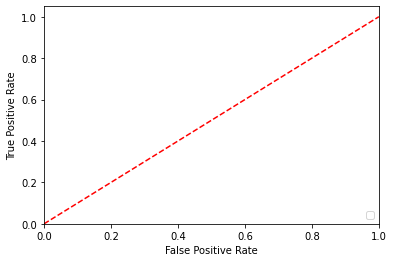

In [112]:
#Treinando e avaliando com a média

test_models(list_models_m,
            "model_name",
            "estimator",
            X_train_w2v_m,
            X_test_w2v_m,
            y_train_w2v,
            y_test_w2v)

c:\Users\Adelaide\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model      : Logistic Regression
Accuracy   : 0.7012 
Precision  : 0.7016 
Recall     : 0.7012 
F1 - Score : 0.6997 
Model      : AdaBoost
Accuracy   : 0.6906 
Precision  : 0.6903 
Recall     : 0.6906 
F1 - Score : 0.6885 


No handles with labels found to put in legend.


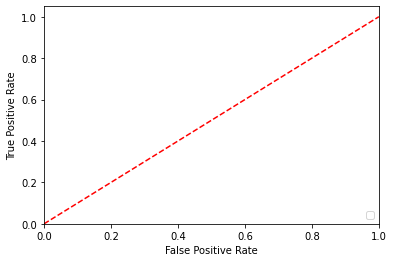

In [113]:
# Trinando e avaliando com a soma
test_models(list_models_s,
            "model_name",
            "estimator",
            X_train_w2v_s,
            X_test_w2v_s,
            y_train_w2v,
            y_test_w2v)

c:\Users\Adelaide\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model      : Logistic Regression
Accuracy   : 0.6985 
Precision  : 0.6926 
Recall     : 0.6985 
F1 - Score : 0.6944 
Model      : AdaBoost
Accuracy   : 0.6845 
Precision  : 0.6773 
Recall     : 0.6845 


No handles with labels found to put in legend.


F1 - Score : 0.6797 


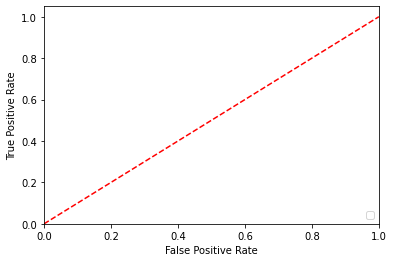

In [114]:
# Treinando e avaliando com a soma normalizada
test_models(list_models_sn,
            "model_name",
            "estimator",
            X_train_w2v_sn,
            X_test_w2v_sn,
            y_train_w2v,
            y_test_w2v)

2.Doc2Vec

In [115]:
#Importação das bibliotecas e instânciando os modelos

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

random_seed = 42

list_models_d2v = [
{'model_name': 'Logistic Regression',
 'estimator' : LogisticRegression(random_state = random_seed, 
                                  solver = 'lbfgs')},
{'model_name': 'AdaBoost',
 'estimator' : AdaBoostClassifier(random_state = random_seed)}
]


c:\Users\Adelaide\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model      : Logistic Regression
Accuracy   : 0.5962 
Precision  : 0.5922 
Recall     : 0.5962 
F1 - Score : 0.5939 


No handles with labels found to put in legend.


Model      : AdaBoost
Accuracy   : 0.6037 
Precision  : 0.5974 
Recall     : 0.6037 
F1 - Score : 0.5967 


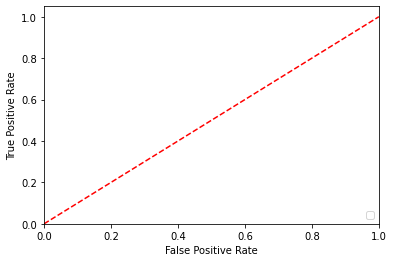

In [116]:
#Treinando e avaliando os modelos

test_models(list_models_d2v,
            "model_name",
            "estimator",
            X_train_d2v_proc,
            X_test_d2v_proc,
            y_train_d2v,
            y_test_d2v)

In [117]:
#Fazendo as predições

y_pred = list_models_d2v[0]['estimator'].predict(X_test_d2v_proc)

c:\Users\Adelaide\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


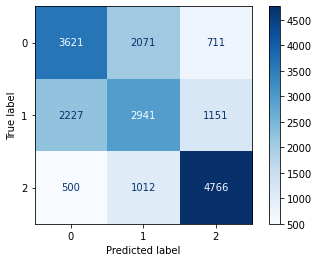

In [118]:
#Plotando matriz de confusão do modelo

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(list_models_d2v[0]['estimator'], X_test_d2v_proc, y_test_d2v, cmap='Blues')
plt.show()

O modelo com melhor métrica foi o de regressão logística com processamento Word2Vec com a média.

Aplicando o modelo no arquivo de submissão.

In [119]:
#Instanciando modelo com melhor performance

lr = LogisticRegression(random_state = random_seed, 
                                  solver = 'lbfgs')

In [120]:
#Treinando modelo e fazendo as predições com a parte de teste
lr.fit(X_train_w2v_s,y_train_w2v)
y_predict = lr.predict(X_test_w2v_s)

c:\Users\Adelaide\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
#Fazendo o processamento da base de submissão

X_w2v_subm = df_subm_reduzida_2["processamento"]

In [122]:
#Fazendo o processamento da base de submissão

X_w2v_subm_m = []

for phrase in X_w2v_subm:
    vecs = []
    for word in phrase:
        if word in model.wv.index_to_key:
            vecs.append(model.wv.get_vector(word))

            
    if vecs:
        soma = np.sum(vecs, axis=0)
        media = soma/len(vecs)

        X_w2v_subm_m.append(media)
        
    else:
        X_w2v_subm_m.append(np.zeros(model.vector_size))
    
X_w2v_subm_m = np.array(X_w2v_subm_m)

In [123]:
#Shape da base de submissão

X_w2v_subm.shape 

(5000,)

In [124]:
#Shape da predição da base processada - Não é do mesmo tamanho da base de submissão
y_predict_subm = lr.predict(X_w2v_subm_m)
y_predict_subm.shape


(5000,)

In [70]:
#Gerando o arquivo cvs com as predições no formato especificado - não é possível por terem shapes diferentes
pd.DataFrame(index=df_subm_reduzida_2["tweet_text"],data={"sentiment_predict":y_predict_subm}).to_csv("adelaide_adurens_735_projeto_2_submissao.csv")